# Método de tendência linear de Holt

Utilizando modelo de suavização exponencial com tendência linear de Holt para prever preço do óleo na Arabia Saudita

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo Excel

In [2]:
dados = pd.read_csv('BrentOilPrices.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])

* Definindo ano como índice

In [5]:
dados = dados.set_index('Date')

* Graficando série temporal

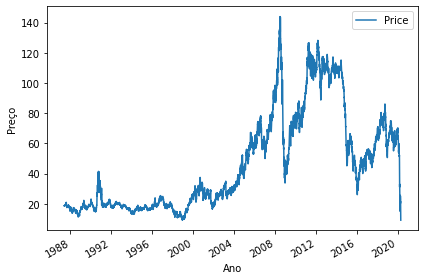

In [6]:
dados.plot()
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.tight_layout()

* Criando amostras de treino e teste

In [15]:
t_treino = dados[dados.index<'2016-01-01'].index.values
t_teste = dados[dados.index>='2016-01-01'].index.values
X_treino = dados[dados.index<'2016-01-01'].values
X_teste = dados[dados.index>='2016-01-01'].values

* Aplicando modelo Exponential Smoothing

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
fit1 = ExponentialSmoothing(X_treino, trend=None, seasonal=None).fit()
fit1 = fit1.forecast(len(X_teste))

fit2 = ExponentialSmoothing(X_treino, trend='mul', damped=True, seasonal=None).fit()
fit2 = fit2.forecast(len(X_teste))

fit3 = ExponentialSmoothing(X_treino, trend='add', damped=True, seasonal=None).fit()
fit3 = fit3.forecast(len(X_teste))

fit4 = ExponentialSmoothing(X_treino, trend='mul', damped=False, seasonal=None).fit()
fit4 = fit4.forecast(len(X_teste))

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


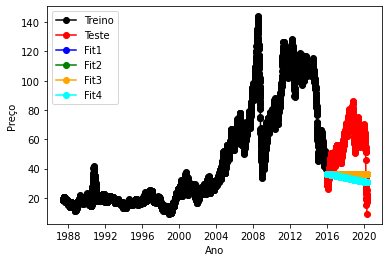

In [31]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit1, marker='o', color='blue',label='Fit1')
plt.plot(t_teste,fit2, marker='o', color='green',label='Fit2')
plt.plot(t_teste,fit3, marker='o', color='orange',label='Fit3')
plt.plot(t_teste,fit4, marker='o', color='cyan',label='Fit4')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

* Calculando erros

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE_beta02 = mean_squared_error(X_teste,fit_beta_02)
MSE_beta05 = mean_squared_error(X_teste,fit_beta_05)
MSE_beta08 = mean_squared_error(X_teste,fit_beta_08)
MSE_beta09 = mean_squared_error(X_teste,fit_beta_09)

In [ ]:
RMSE_beta02 = np.sqrt(MSE_beta02)
RMSE_beta05 = np.sqrt(MSE_beta05)
RMSE_beta08 = np.sqrt(MSE_beta08)
RMSE_beta09 = np.sqrt(MSE_beta09)

In [ ]:
print("RMSE (beta=0.2) = {:0.2f}".format(RMSE_beta02))
print("RMSE (beta=0.5) = {:0.2f}".format(RMSE_beta05))
print("RMSE (beta=0.8) = {:0.2f}".format(RMSE_beta08))
print("RMSE (beta=0.9) = {:0.2f}".format(RMSE_beta09))